<a href="https://colab.research.google.com/github/EmersonFranca/IDH_Atlas/blob/master/Criando_Features/Sem_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import xgboost
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import probplot

# 2. Versões das bibliotecas importadas

In [3]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)


1.0.3
1.18.4
0.10.1


# 3. Importando meu arquivo python de Funções

In [4]:
pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=126c268c3a2d3a827dfda0ea52221dceb90e494d0ca4c80f95efdaf02917c1a1
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [0]:
# Primeiro passo, salvar o arquivo Funcoes_para_Previsao no drive
# Segundo passo, clicar em Mount Drive
# Terceiro passo, mover o arquivo Funcoes_para_Previsao para o mesmo nível da pasta sample_data e drive

In [0]:
import import_ipynb

importing Jupyter notebook from Funcoes_para_Previsao.ipynb
1.0.3
1.18.4
0.10.1
Quantidade de registros para Teste:  1670
Quantidade de registros para Treino:  3895
[12:09:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
df_teste_retorno:  (1670, 9)
r2_score:  0.6615025330789903
raiz_do_erro_quadratico_medio:  114.70502325202254


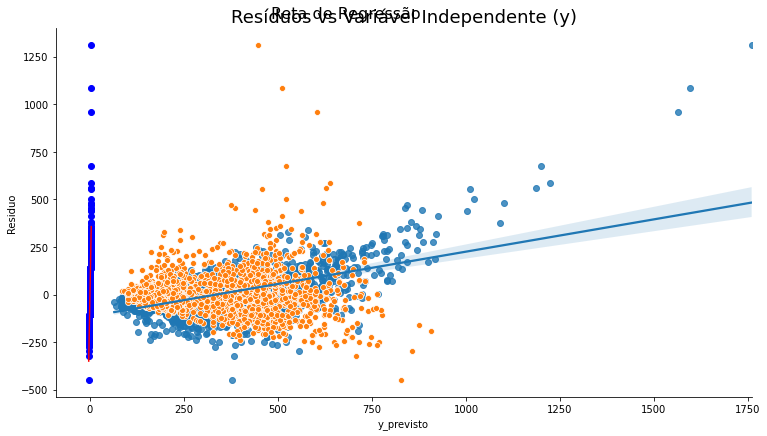

In [7]:
import Funcoes_para_Previsao

# 4. Importando os dados

In [0]:
URL_IDH_1991 = "https://github.com/EmersonFranca/IDH_Atlas/blob/master/Dados/IDH_1991.csv?raw=true"
URL_IDH_2000 = "https://github.com/EmersonFranca/IDH_Atlas/blob/master/Dados/IDH_2000.csv?raw=true"
URL_IDH_2010 = "https://github.com/EmersonFranca/IDH_Atlas/blob/master/Dados/IDH_2010.csv?raw=true"

In [0]:
dfIDH_2000 = pd.read_csv(URL_IDH_2000,sep=';')

# 5. Preparando dados de treino e teste

In [0]:
colunas_analise = ['RDPC','T_AGUA','AGUA_ESGOTO','T_LIXO','T_LUZ','T_BANAGUA']

In [12]:
df = dfIDH_2000[colunas_analise]
df.head()

,RDPC,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA
0,371.15,57.13,27.52,70.33,70.14,42.56
1,530.87,73.54,21.14,90.61,93.43,67.08
2,342.46,58.61,27.36,76.57,80.31,46.33
3,456.63,78.60,14.28,90.22,90.58,67.20
4,511.47,73.98,24.82,70.04,91.79,61.93


In [0]:
df_teste, df_treino = Funcoes_para_Previsao.retorna_dfTeste_e_dfTreino(df, 0.3, 123, 'RDPC')

In [14]:
df_teste.head()

,RDPC,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA
2394,464.32,95.27,1.34,97.15,98.39,94.65
3965,229.43,74.04,17.22,67.23,82.93,49.79
3363,555.87,97.15,1.07,99.22,99.37,96.24
1533,122.38,27.25,15.74,70.73,80.22,15.32
2769,153.25,35.81,17.64,80.04,69.94,33.37


In [15]:
df_treino.head()

,RDPC,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA
0,371.15,57.13,27.52,70.33,70.14,42.56
1,530.87,73.54,21.14,90.61,93.43,67.08
2,342.46,58.61,27.36,76.57,80.31,46.33
3,456.63,78.60,14.28,90.22,90.58,67.20
5,401.32,70.51,24.24,58.71,92.39,57.73


# 6. Escolhendo o modelo para teste

In [0]:
modelo = xgboost.XGBRegressor(learning_rate=0.1,max_depth=3,n_estimators=100,reg_alpha=0.80,seed=180) 

# 7. Aplicando o modelo preditivo

In [18]:
retorno_df_teste, r2_score, raiz_erro_quadratico_medio = Funcoes_para_Previsao.testa_modelo(modelo, df_teste,df_treino)

[12:18:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# <font color = 'red'> 8. Analisando resultado </font>

*   **T_AGUA ->** % da população com água encanada
*   **AGUA_ESGOTO ->** % de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados
*   **T_LIXO ->** % da população em domicílios com coleta de lixo
*   **T_LUZ ->** % da população em domicílios com energia elétrica
*   **T_BANAGUA ->** % da população em domicílios com banheiro e água encanada

In [19]:
retorno_df_teste

,RDPC,T_AGUA,AGUA_ESGOTO,T_LIXO,T_LUZ,T_BANAGUA,y_previsto,Residuo,Residuo_Absoluto
2394,464.32,95.27,1.34,97.15,98.39,94.65,479.023712,-14.703712,14.703712
3965,229.43,74.04,17.22,67.23,82.93,49.79,234.342636,-4.912636,4.912636
3363,555.87,97.15,1.07,99.22,99.37,96.24,557.832520,-1.962520,1.962520
1533,122.38,27.25,15.74,70.73,80.22,15.32,146.395859,-24.015859,24.015859
2769,153.25,35.81,17.64,80.04,69.94,33.37,171.715454,-18.465454,18.465454
...,...,...,...,...,...,...,...,...,...
1637,165.52,51.58,38.75,72.60,90.78,46.11,230.226212,-64.706212,64.706212
3649,402.55,99.08,0.32,100.00,100.00,98.07,510.716400,-108.166400,108.166400
1692,160.89,44.11,37.84,90.01,94.34,35.09,196.443710,-35.553710,35.553710
2903,534.12,95.61,1.20,99.55,95.85,96.31,479.954071,54.165929,54.165929


In [20]:
r2_score

0.6615025330789903

In [21]:
raiz_erro_quadratico_medio

114.70502325202254

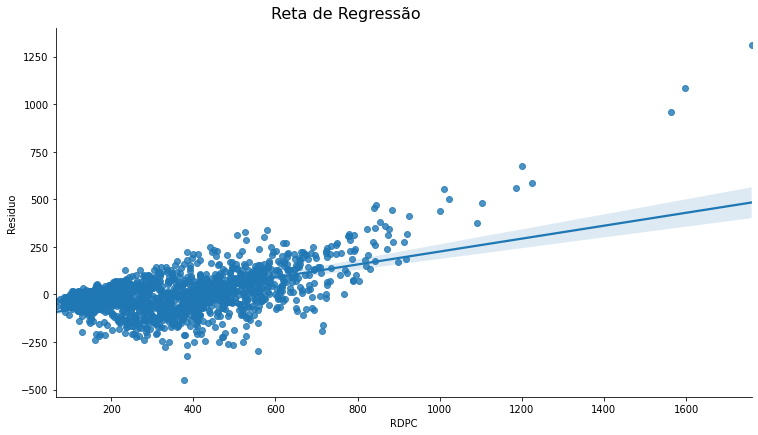

In [24]:
Funcoes_para_Previsao.plota_regressaolinear_RDPC_yprevisto(retorno_df_teste)

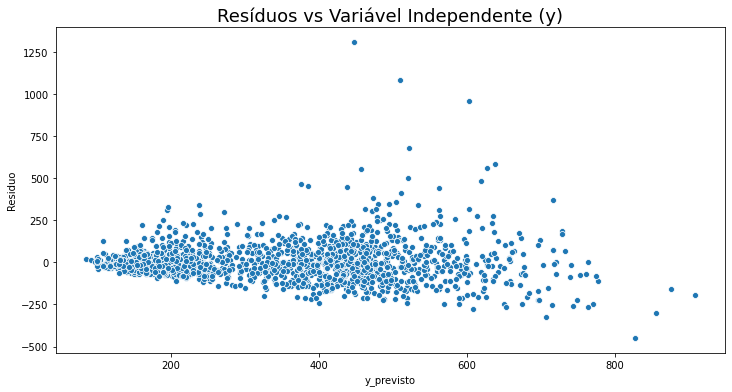

In [25]:
Funcoes_para_Previsao.plota_residuos_vs_yprevisto(retorno_df_teste)

(0.9203512560830508,
 (0.9203512560830508, 0.9203512560830508, 0.9203512560830508))

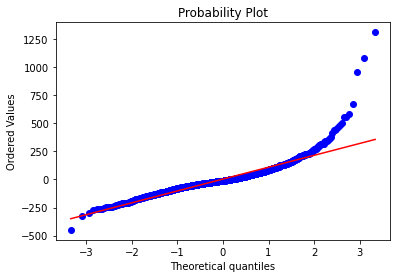

In [26]:
Funcoes_para_Previsao.plota_probplot_residuos(retorno_df_teste)